# 基础图像处理

In [1]:
# 导入工具包

from IPython.display import display, Markdown, Latex
from tqdm import tqdm
import seaborn as sns
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline

# 显示设置
def set_style():
    sns.set_style('whitegrid')
    matplotlib.rcParams['font.family'] = 'SimHei'
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    pd.options.display.max_columns = 300
    pd.options.display.max_rows = 1000
    # plt.rcParams['figure.dpi'] = 200
    sns.set_palette('muted')  # 调色板颜色温和
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1})

set_style()

# 工具函数
def img_read_show(img_path):
    img_source = cv2.imread(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_source)
    plt.grid(False)
    plt.show()


def plt_show(img_ndarray, figsize=(24,6), gray=True):
    plt.figure(figsize=figsize)
    plt.grid(False)
    if gray:
        plt.imshow(img_ndarray, 'gray')
    else:
        plt.imshow(img_ndarray)
    plt.show()


# 数据结构 imgs = [{"name": "title", "content": img, "type":"img"}]
def plt_series_show(imgs=[{},], lay_out=(1,2), figsize=(24,6)):
    """画序列图
    para:
        imgs:顺序展示的图像字典
        lay_out: 图像展示的顺序 默认画两张图
        figsize: 画板大小
    """
    
    def plt_show_gray(img, img_name):
        plt.title(img_name)
        plt.grid(False)
        plt.imshow(img, 'gray')
        
    def plt_plot(fig, title_name):
        plt.xlim([0, 256])
        plt.title(title_name)
        plt.plot(fig)
        
    plt.figure(figsize=figsize)
    for i, img_ in enumerate(imgs):
        plt.subplot(*lay_out, i+1)
        if img_["type"] == "img":
            plt_show_gray(img_["content"], img_["name"])
        elif img_["type"] == "fig":
            plt_plot(img_["content"], img_["name"])
        else:
            raise ValueError("img_[type]")
    plt.show
    

## 原图

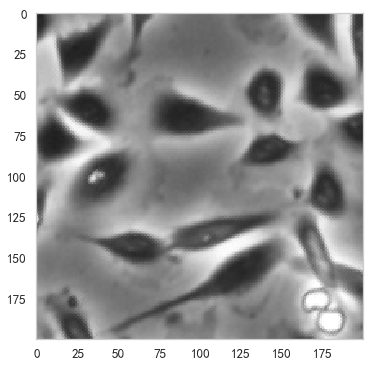

In [4]:
img_path = './imgs/img_d4_1a_6428.jpg'
img_read_show(img_path)

## 灰度图

In [ ]:
imgray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

## [直方图均衡化](https://zhuanlan.zhihu.com/p/44918476)
直方图均衡化(Histogram Equalization)是一种增强图像对比度(Image Contrast)的方法，其主要思想是将一副图像的直方图分布变成近似均匀分布，从而增强图像的对比度。

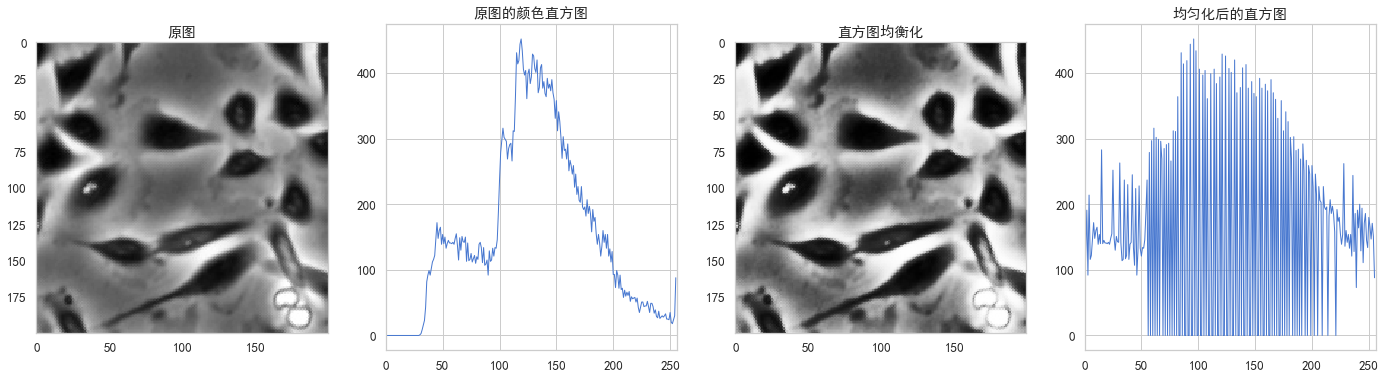

In [5]:
# 1 原图
img_origin = cv2.imread(img_path, 0)
# 2 原图的颜色直方图
hist_1 = cv2.calcHist([img_origin], [0], None, [256], [0, 256])
# 3 直方图均衡化
img_2 = cv2.equalizeHist(img_origin)
# 4 均匀化后的图
hist_2 = cv2.calcHist([img_2], [0], None, [256], [0, 256])

imgs = [{"name": "原图", "content": img_origin, "type": "img"},
       {"name": "原图的颜色直方图", "content": hist_1, "type":"fig"},
       {"name": "直方图均衡化", "content": img_2, "type":"img"},
       {"name": "均匀化后的直方图", "content": hist_2, "type":"fig"}]

plt_series_show(imgs, lay_out=(1,4), figsize=(24,6))

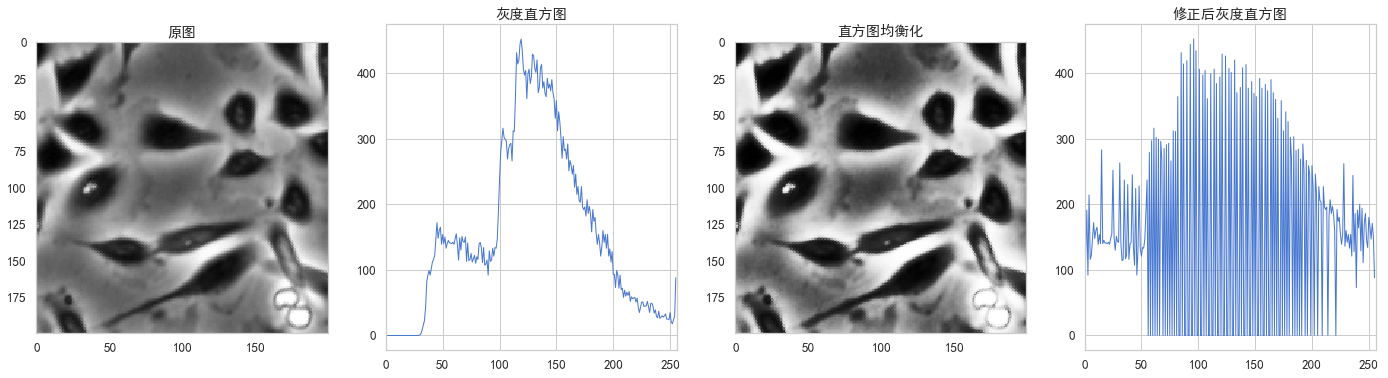

In [6]:
img = cv2.imread(img_path, 0)
# 1 原图
plt.figure(figsize=(24, 6))
plt.subplot(*(1, 4), 1)
plt.title('原图')
plt.grid(False)
plt.imshow(img, 'gray')

# 2 原图的颜色直方图
plt.subplot(*(1, 4), 2)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.xlim([0, 256])
plt.title('灰度直方图')
plt.plot(hist)
# 3 直方图均衡化
img = cv2.equalizeHist(img)
plt.subplot(1, 4, 3)
plt.title('直方图均衡化')
plt.grid(False)
plt.imshow(img, 'gray')

# 4 均匀化后的图
plt.subplot(1, 4, 4)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.xlim([0, 256])
plt.title('修正后灰度直方图')
plt.plot(hist)
plt.show()

## 图像滤波
尽量保留图像细节特征的条件下对目标图像的噪声进行抑制，其处理效果的好坏将直接影响到后续图像处理和分析的有效性和可靠性。这里对比几种不同的滤波效果，选择中值滤波进行后续操作。

高斯滤波的作用：
>高斯滤波器是一种线性滤波器，能够有效的抑制噪声，平滑图像。其作用原理和均值滤波器类似，都是取滤波器窗口内的像素的均值作为输出。其窗口模板的系数和均值滤波器不同，均值滤波器的模板系数都是相同的为1；而高斯滤波器的模板系数，则随着距离模板中心的增大而系数减小。所以，高斯滤波器相比于均值滤波器对图像个模糊程度较小。


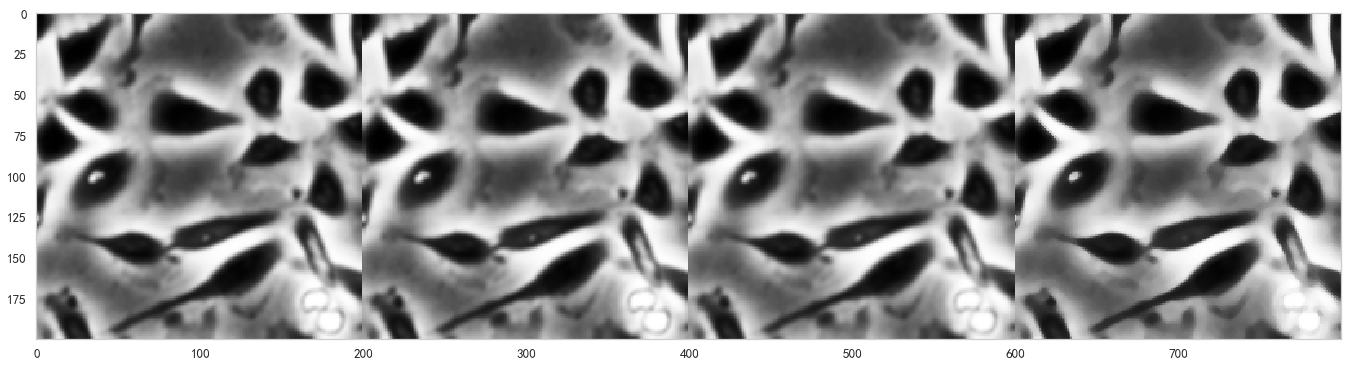

In [7]:
# 均值滤波 平均卷积操作
blur = cv2.blur(img_2, (3, 3))

# 方框滤波 基本和均值一样，可以选择归一化
box = cv2.boxFilter(img_2, -1, (3, 3), normalize=True)

# 高斯滤波 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
# 这里(5, 5)表示高斯矩阵的长与宽都是5，标准差取0时OpenCV会根据高斯矩阵的尺寸自己计算。
# 概括地讲，高斯矩阵的尺寸越大，标准差越大，处理过的图像模糊程度越大。
aussian = cv2.GaussianBlur(img_2, (5, 5), 1)

# 中值滤波 相当于用中值代替
median = cv2.medianBlur(img_2, 5)

res = np.hstack((blur, box, aussian, median))

plt_show(res)

## 图像形态
膨胀与腐蚀(Dilation与Erosion)。膨胀与腐蚀能实现多种多样的功能:
>1)消除噪声,2)分割(isolate)出独立的图像元素，3)在图像中连接(join)相邻的元素;4)寻找图像中的明显的极大值区域或极小值区域;5)
求出图像的梯度

腐蚀和膨胀是对白色部分（高亮部分）而言的，不是黑色部分。腐蚀就是原图中的高亮部分被腐蚀，“领域被蚕食”，效果图拥有比原图更小的高亮区域。
膨胀就是图像中的高亮部分进行膨胀，“领域扩张”，效果图拥有比原图更大的高亮区域。

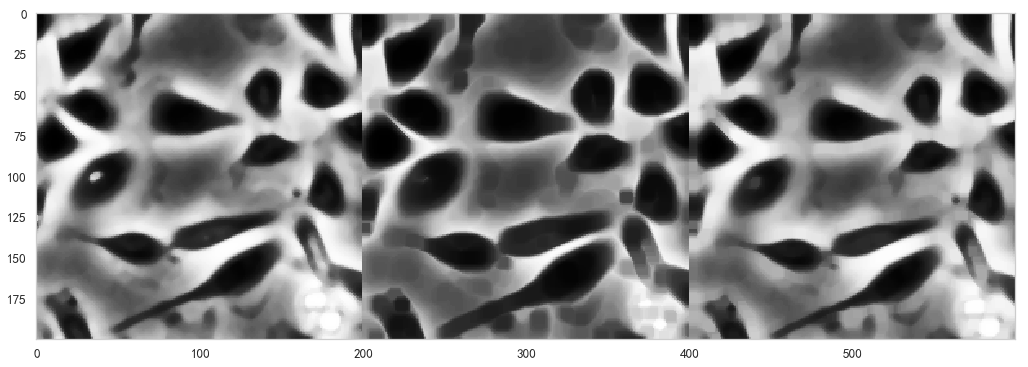

In [8]:
kernel = np.ones((2, 2), np.uint8)
erosion = cv2.erode(median, kernel, iterations=4)  # 腐蚀了4次

kernel = np.ones((2, 2), np.uint8)
dige_dilate = cv2.dilate(erosion, kernel, iterations=4)  # 膨胀了4次

compare = np.hstack((median, erosion, dige_dilate))

plt_show(compare, figsize=(18, 6))

**开运算** = 先腐蚀运算，再膨胀运算（看上去把细微连在一起的两块目标分开了）

**闭运算** = 先膨胀运算，再腐蚀运算（看上去将两个细微连接的图块封闭在一起）

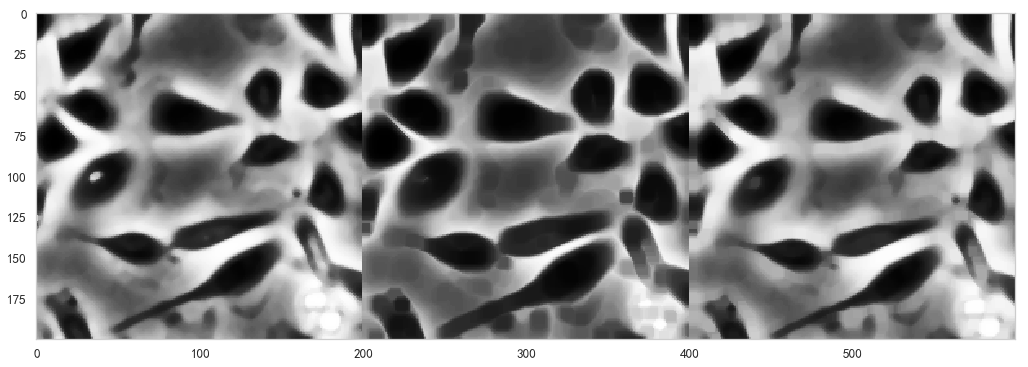

In [9]:
# 开运算 先腐蚀，再膨胀
kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)

# 闭运算：先膨胀，再腐蚀
kernel = np.ones((5,5),np.uint8) 
closing = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)

res = np.hstack((median, opening, closing))

plt_show(compare, figsize=(18, 6))

**顶帽运算** = 原图像-开运算图，（突出原图像中比周围亮的区域）

**黑帽运算** = 闭运算图-原图像，（突出原图像中比周围暗的区域）

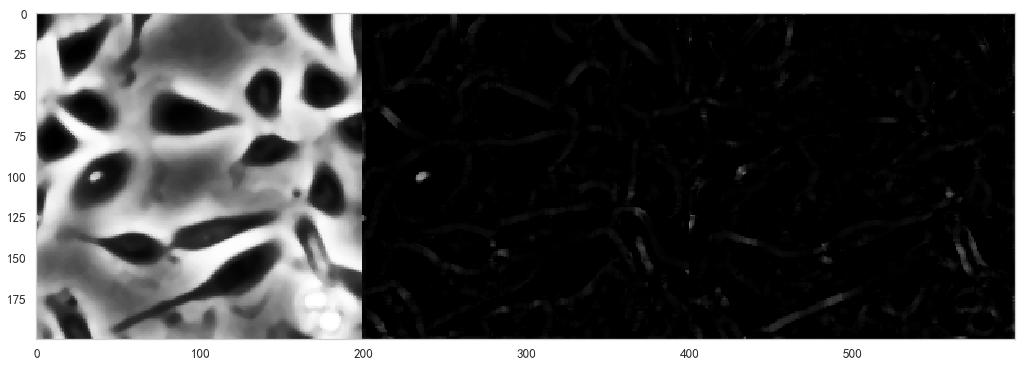

In [10]:
# 顶帽
tophat = cv2.morphologyEx(median, cv2.MORPH_TOPHAT, kernel)
# 黑帽
blackhat  = cv2.morphologyEx(median,cv2.MORPH_BLACKHAT, kernel)

res = np.hstack((median, tophat, blackhat))

plt_show(res, figsize=(18, 6))

**梯度**：膨胀图与腐蚀图之差，提取物体边缘

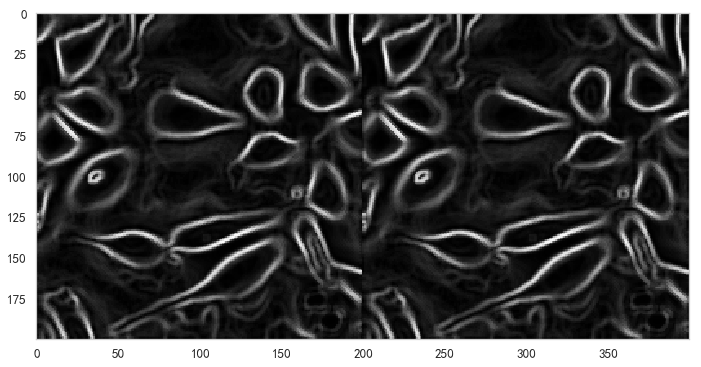

In [11]:
# 1 膨胀图与腐蚀图之差
kernel = np.ones((3, 3), np.uint8)
dilate = cv2.dilate(median, kernel, iterations=1)
erosion = cv2.erode(median, kernel, iterations=1)
gradient = dilate - erosion
# 2 cv2.morphologyEx  梯度
grad = cv2.morphologyEx(median, cv2.MORPH_GRADIENT, kernel)

res = np.hstack((gradient, grad))

plt_show(res, figsize=(12, 6))

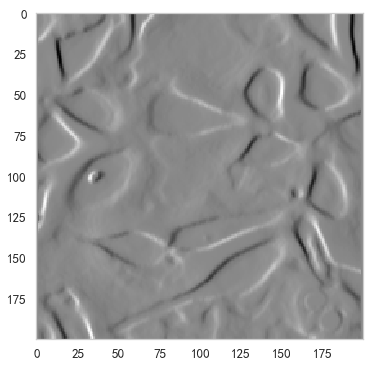

In [12]:
sobelx = cv2.Sobel(median, cv2.CV_64F, 1, 0, ksize=3)

plt_show(sobelx, figsize=(12, 6))

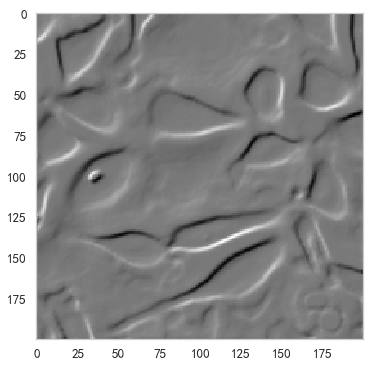

In [13]:
sobelx = cv2.Sobel(median, cv2.CV_64F, 1, 0, ksize=3)
# sobelx = cv2.convertScaleAbs(sobelx)

sobely = cv2.Sobel(median, cv2.CV_64F, 0, 1, ksize=3)
# sobely = cv2.convertScaleAbs(sobely)

sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

plt_show(sobelxy)

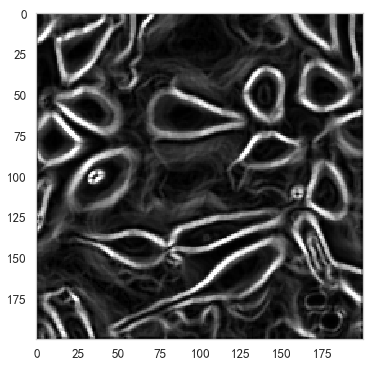

In [14]:
sobelx = cv2.Sobel(median, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)

sobely = cv2.Sobel(median, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)

sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

plt_show(sobelxy)

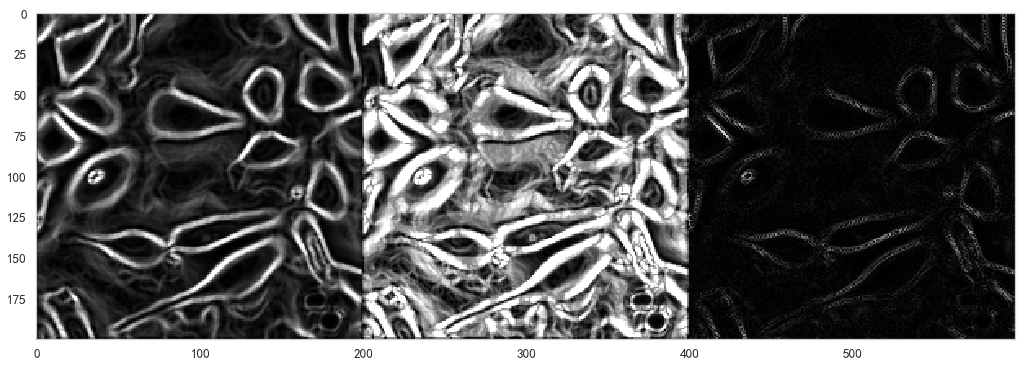

In [15]:
#不同算子的差异

sobelx = cv2.Sobel(median,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(median,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

scharrx = cv2.Scharr(median,cv2.CV_64F,1,0)
scharry = cv2.Scharr(median,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

laplacian = cv2.Laplacian(median,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
plt_show(res, figsize=(18,6))

## 边缘检测(Canny)

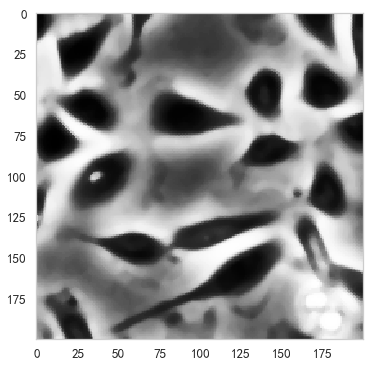

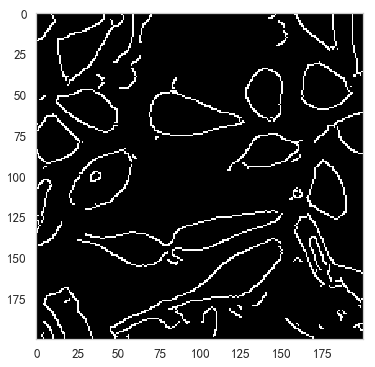

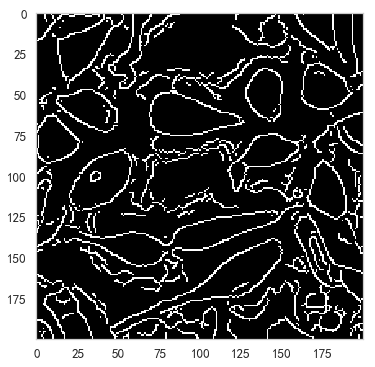

In [16]:
v1 = cv2.Canny(median, 150, 200)
v2 = cv2.Canny(median, 50, 100)
plt_show(median)
plt_show(v1)
plt_show(v2)

## 图像轮廓
### 二值化

>ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

>cv2.THRESH_BINARY:当像素点的值大于thresh时取maxval,否则取0；

>cv2.THRESH_BINARY_INV:当像素点的值大于thresh时取0,否则取maxval

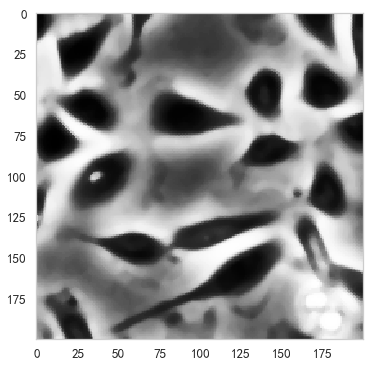

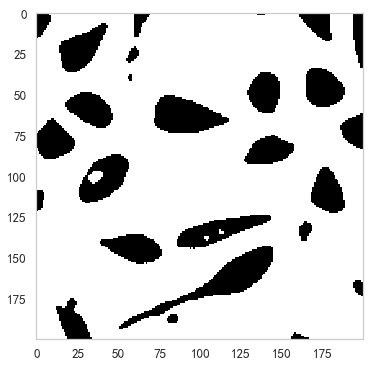

In [17]:
ret, thresh = cv2.threshold(median, 50, 255, cv2.THRESH_BINARY)
plt_show(median)
plt_show(thresh)

### 自适应二值化


>dst = cv2.adaptiveThreshold(src, maxval, thresh_type, type, Block Size, C)

- src： 输入图，只能输入单通道图像，通常来说为灰度图

- dst： 输出图

- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值

- thresh_type： 阈值的计算方法，包含以下2种类型：cv2.ADAPTIVE_THRESH_MEAN_C； cv2.ADAPTIVE_THRESH_GAUSSIAN_C.

- type：二值化操作的类型，与固定阈值函数相同，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV.

- Block Size： 图片中分块的大小

- C ：阈值计算方法中的常数项


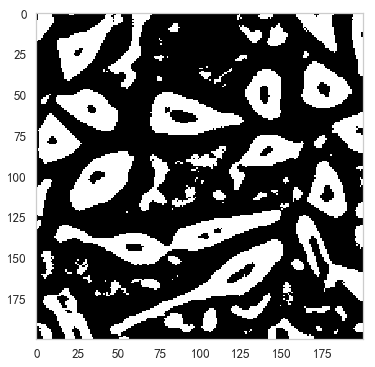

In [18]:
img_thresh = cv2.adaptiveThreshold(
   median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 10)
plt_show(img_thresh)

### 轮廓绘制

(19,)


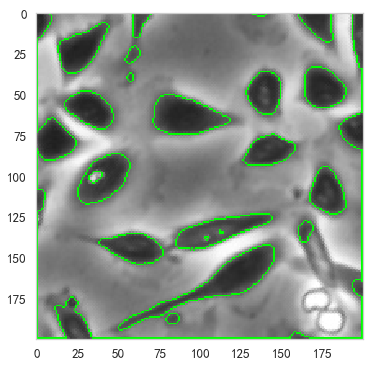

In [19]:
# contours, hierarchy = cv2.findContours() 画出所有的框
img_source = cv2.imread(img_path)
# 在二值化后的图thresh上画轮廓
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 轮廓个数
print(np.array(contours).shape)

draw_img = img_source.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 255, 0), 1)

plt_show(res, figsize=(6,6))

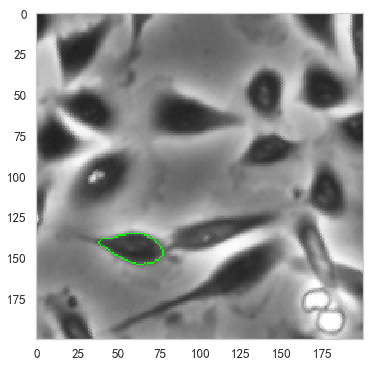

In [20]:
# findContours() 画出一个框
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
draw_img = img_source.copy()
res = cv2.drawContours(draw_img, contours[3], -1, (0, 255, 0), 1)

plt_show(res, figsize=(6,6))

### 轮廓特征

轮廓的面积和周长

In [21]:
cnt = contours[3]  # 一个轮廓是一系列的点
print(cnt.shape) # 由83个点来描述contour[3]
#面积
print('area:', cv2.contourArea(cnt))

#周长，True表示闭合的
print('length:', cv2.arcLength(cnt,True))

# 轮廓的矩形度
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print('轮廓面积与其边界矩形的面积比：', extent)

(83, 1, 2)
area: 495.5
length: 97.49747383594513
轮廓面积与边界矩形比 0.619375


## 轮廓处理

### 边界矩形

x:38,y:135, w:40, h:20


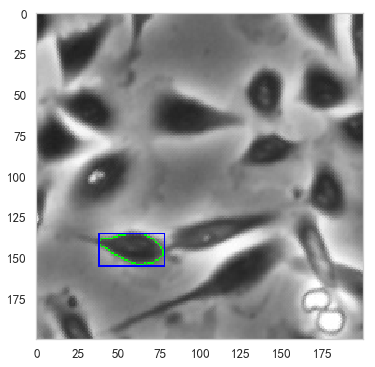

In [22]:
cnt = contours[3]  # 一个轮廓是一系列的点
x, y, w, h = cv2.boundingRect(cnt)
print('x:{},y:{}, w:{}, h:{}'.format(x, y, w, h))
res = cv2.rectangle(draw_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
plt_show(res)

### 外接圆

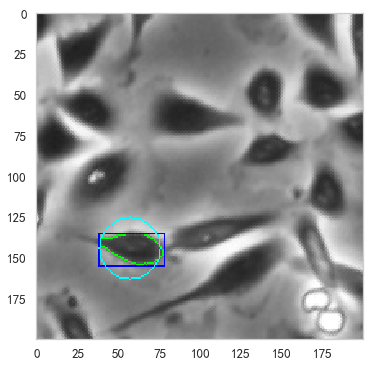

In [23]:
cnt = contours[3]
def draw_enclose_circle(cnt):
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    res = cv2.circle(draw_img, center, radius, (0, 255, 255), 1)
    plt_show(res)
    
draw_enclose_circle(cnt)

### 轮廓近似

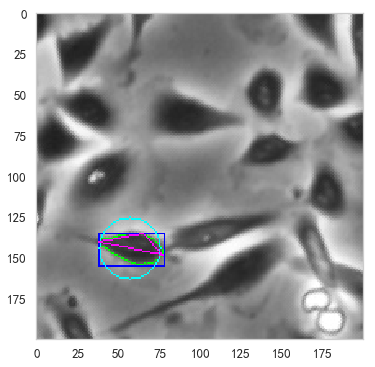

In [24]:
epsilon = 0.1*cv2.arcLength(cnt,True) 
approx = cv2.approxPolyDP(cnt,epsilon,True)

res = cv2.drawContours(draw_img, [approx], -1, (255, 0, 255), 1)
plt_show(res)

### 轮廓凸包

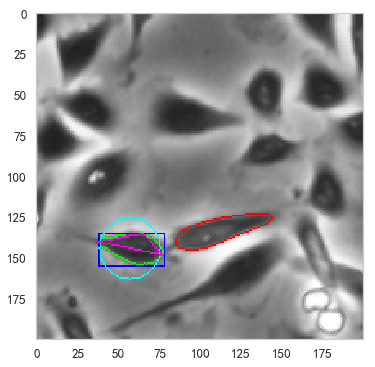

In [25]:
cnt = contours[5]
hull = cv2.convexHull(cnt, False)
res = cv2.drawContours(draw_img, [hull], -1, (255, 0, 0), 1)
# res = cv2.drawContours(draw_img, hull, -1, (255, 0, 0), 2)  # hull 不用作数组传进去的话，画出来的是一个个点
plt_show(res)

凸包的外接矩形

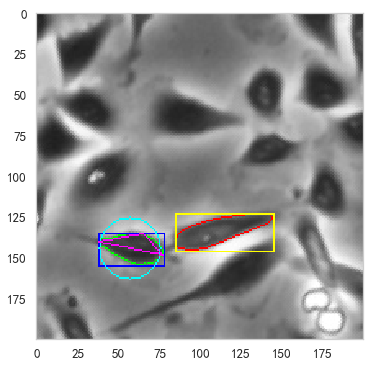

In [26]:
x, y, width, height = cv2.boundingRect(hull) 
rectangle = cv2.rectangle(draw_img,(x+width,y),(x,y+height),(255, 255, 0), 1)
plt_show(rectangle)

### 最小外接矩形

矩形包围框的面积最小，考虑到了对象的旋转（原理使用到到了PCA方法）
使用函数cv2.minAreaRect()获得，返回Box2D结构，包含左上角坐标（x,y）矩形宽，高（w,h），以及旋转角度
可以通过cv2.boxPoints()函数绘制


((114.05000305175781, 132.14999389648438), (61.34819030761719, 15.495161056518555), -18.434947967529297)
[[ 87 149]
 [ 82 134]
 [140 115]
 [145 129]]


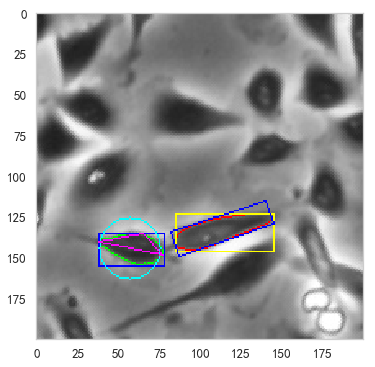

In [27]:
# draw_img = img_source.copy()
rect = cv2.minAreaRect(cnt)
print(rect)
box = cv2.boxPoints(rect)
box = np.int0(box)  # int0 等价与int64 将浮点数转换为整数
res = cv2.drawContours(draw_img, [box], 0, (0, 0, 255), 1)
plt_show(res)

最小外接矩形的外接矩形

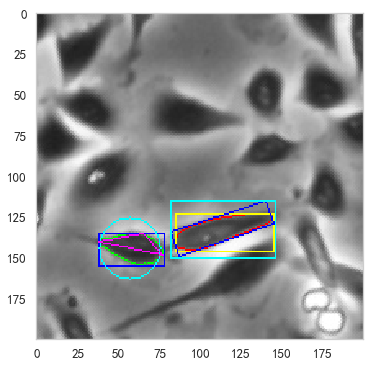

In [66]:
x, y, width, height = cv2.boundingRect(box) 
rectangle = cv2.rectangle(draw_img,(x+width,y),(x,y+height),(0, 255, 255), 1)
plt_show(rectangle)

### 椭圆拟合

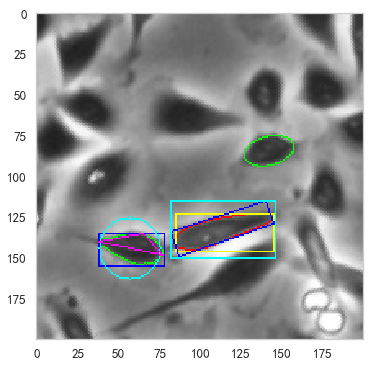

In [67]:
cnt = contours[11]
ellipse = cv2.fitEllipse(cnt)
res = cv2.ellipse(draw_img,ellipse,(0,255,0),1)
plt_show(res)

### 轮廓矩心

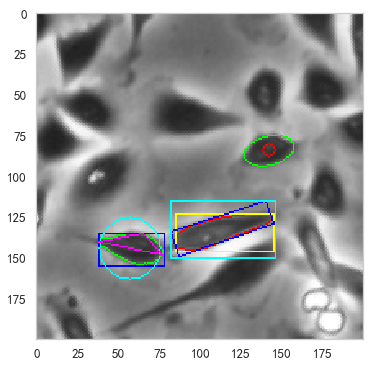

In [68]:
M = cv2.moments(contours[11])
        
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

res = cv2.circle(draw_img, (cx, cy), 4, (255,0,0), 1)
plt_show(res)

## 轮廓特征

In [69]:
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 轮廓个数

def cont_df_analy(contours):
    
    print('轮廓个数:', np.array(contours).shape[0])
    cont_arclength = []  # 轮廓周长
    hull = []  # 轮廓凸包
    hull_arclength = []  # 凸包周长

    for i in range(len(contours)):
        hull.append(cv2.convexHull(contours[i], True))  # 轮廓凸包
        cont_arclength.append(cv2.arcLength(contours[i], True))  # 轮廓周长
        hull_arclength.append(cv2.arcLength(hull[i], True))  # 轮廓凸包周长

    cont_area = []
    hull_area = []
    for i in range(len(contours)):
        cont_area.append(cv2.contourArea(contours[i]))
        hull_area.append(cv2.contourArea(hull[i]))

    df_area = pd.DataFrame({
        'area': cont_area,
        'area_hull': hull_area,
        'arclength': cont_arclength,
        'arclength_hull': hull_arclength
    })

    df_area['r1'] = df_area['area'] / df_area['arclength']  # 轮廓面积 / 轮廓周长 = 面积周长比
    df_area['r2'] = df_area['arclength'] / df_area['arclength_hull']
    df_area['r3'] = df_area['area'] / df_area['area_hull']  # 
    df_area['d1'] = df_area['area_hull'] - df_area['area']  # 凸包的面积 - 轮廓的面积
    df_area = df_area[df_area['area'] > 100]  # 筛选出面积大于100的轮廓
    df_area = df_area[df_area['area'] < 2000]
    return df_area

df_area = cont_df_analy(contours)
df_area

轮廓个数: 19


area  area_hull   arclength  arclength_hull        r1        r2  \
2   1081.0     1491.5  240.107646      225.702246  4.502147  1.063825   
3    495.5      516.0   97.497474       92.730337  5.082183  1.051409   
5    653.0      700.0  140.568542      132.539164  4.645421  1.060581   
8    445.5      458.0   83.840620       80.502683  5.313653  1.041464   
9    649.0      669.5  102.568542       97.714950  6.327476  1.049671   
11   416.5      429.5   83.840620       80.692078  4.967759  1.039019   
12   779.5      808.0  121.497474      115.679032  6.415771  1.050298   
13   462.0      474.5   84.911687       81.883943  5.440947  1.036976   
15   418.0      425.5   77.597979       75.406895  5.386738  1.029057   
16   486.5      492.5   83.012193       81.112216  5.860585  1.023424   
18   538.5      568.0  101.154328       96.006620  5.323549  1.053618   

          r3     d1  
2   0.724774  410.5  
3   0.960271   20.5  
5   0.932857   47.0  
8   0.972707   12.5  
9   0.969380   20.5  
11  0.969732   13.0  
12  0.964728   28.5  
13  0.973656   12.5  
15  0.982374    7.5  
16  0.987817    6.0  
18  0.948063   29.5

In [70]:
df_area.describe()

area    area_hull   arclength  arclength_hull         r1  \
count    11.000000    11.000000   11.000000       11.000000  11.000000   
mean    584.090909   639.363636  110.599737      105.451833   5.387839   
std     200.823905   308.365537   46.964602       43.468903   0.614901   
min     416.500000   425.500000   77.597979       75.406895   4.502147   
25%     453.750000   466.250000   83.840620       80.902147   5.024971   
50%     495.500000   516.000000   97.497474       92.730337   5.323549   
75%     651.000000   684.750000  112.033008      106.696991   5.650766   
max    1081.000000  1491.500000  240.107646      225.702246   6.415771   

              r2         r3          d1  
count  11.000000  11.000000   11.000000  
mean    1.045395   0.944215   55.272727  
std     0.012622   0.074362  118.410380  
min     1.023424   0.724774    6.000000  
25%     1.037998   0.954167   12.500000  
50%     1.049671   0.969380   20.500000  
75%     1.052513   0.973182   29.000000  
max     1.063825   0.987817  410.500000

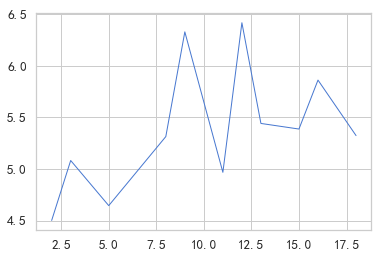

In [71]:
plt.plot(df_area.r1)
plt.show()

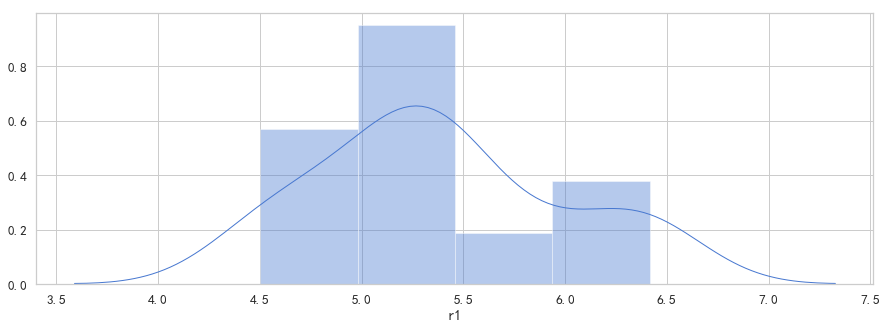

In [72]:
plt.figure(figsize=(15,5))
sns.distplot(df_area[df_area['area']>80].r1)
plt.show()

### 轮廓面积与轮廓线长度的比

In [73]:
df_area.sort_values('r1')

area  area_hull   arclength  arclength_hull        r1        r2  \
2   1081.0     1491.5  240.107646      225.702246  4.502147  1.063825   
5    653.0      700.0  140.568542      132.539164  4.645421  1.060581   
11   416.5      429.5   83.840620       80.692078  4.967759  1.039019   
3    495.5      516.0   97.497474       92.730337  5.082183  1.051409   
8    445.5      458.0   83.840620       80.502683  5.313653  1.041464   
18   538.5      568.0  101.154328       96.006620  5.323549  1.053618   
15   418.0      425.5   77.597979       75.406895  5.386738  1.029057   
13   462.0      474.5   84.911687       81.883943  5.440947  1.036976   
16   486.5      492.5   83.012193       81.112216  5.860585  1.023424   
9    649.0      669.5  102.568542       97.714950  6.327476  1.049671   
12   779.5      808.0  121.497474      115.679032  6.415771  1.050298   

          r3     d1  
2   0.724774  410.5  
5   0.932857   47.0  
11  0.969732   13.0  
3   0.960271   20.5  
8   0.972707   12.5  
18  0.948063   29.5  
15  0.982374    7.5  
13  0.973656   12.5  
16  0.987817    6.0  
9   0.969380   20.5  
12  0.964728   28.5

In [74]:
index_list = df_area.sort_values('r1').index[2:-2]  # 去掉首尾的索引
index_list

Int64Index([11, 3, 8, 18, 15, 13, 16], dtype='int64')

In [75]:
for i in index_list:
    print(i)

11
3
8
18
15
13
16


In [ ]:
# 轮廓面积与轮廓线长度的比
img_source = cv2.imread('data/big_ceils/0/img_d4_1a_6428.jpg')
for i in df_area.sort_values('area').index:
    cv2.drawContours(img_source, contours[i], -1, (0, 255, 255), 1)
plt_show(img_source)

In [ ]:
# 轮廓面积与轮廓线长度的比
img_source = cv2.imread('data/big_ceils/0/img_d4_1a_6428.jpg')

for i in df_area.sort_values('r1').index:
    cv2.drawContours(img_source, contours[i], -1, (0, 0, 255), 1)
    
plt_show(img_source)

###  轮廓面积与凸面积比

In [ ]:
# 轮廓面积与凸面积比
img_source = cv2.imread('data/big_ceils/0/img_d4_1a_6428.jpg')
for i in df_area.sort_values('r3').index:
    cv2.drawContours(img_source, contours[i], -1, (255, 0, 255), 1)
plt_show(img_source)

# 霍夫圆检测

>cv2.HoughCircles(image,method,dp,minDist[, circles[,param1, param2[,minRadius[,maxRadius]]]]])

- image 输入矩阵
- method cv2.HOUGH_GRADIENT 也就是霍夫圆检测，梯度法
- dp 计数器的分辨率图像像素分辨率与参数空间分辨率的比值（官方文档上写的是图像分辨率与累加器分辨率的比值，它把参数空间认为是一个累加器，毕竟里面存储的都是经过的像素点的数量），dp=1，则参数空间与图像像素空间（分辨率）一样大，dp=2，参数空间的分辨率只有像素空间的一半大
- minDist 圆心之间最小距离，如果距离太小，会产生很多相交的圆，如果距离太大，则会漏掉正确的圆
- param1 canny检测的双阈值中的高阈值，低阈值是它的一半
- param2 最小投票数（基于圆心的投票数）
- minRadius 需要检测院的最小半径
- maxRadius 需要检测院的最大半径

1


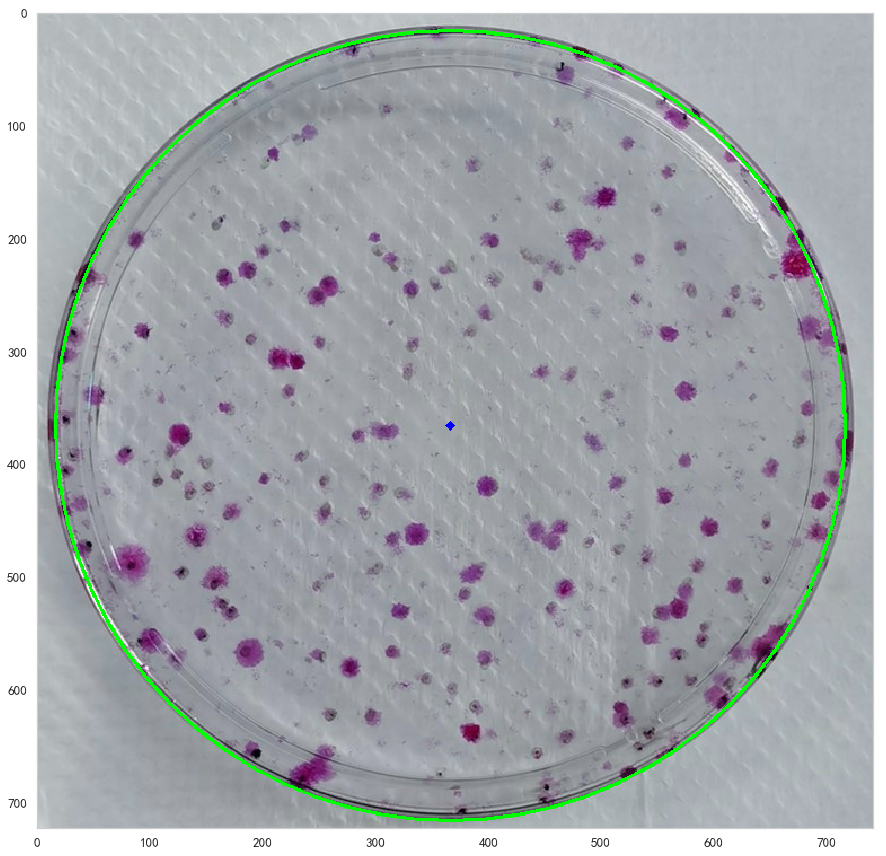

In [2]:
img = cv2.imread('./imgs/187.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaussian_gray = cv2.GaussianBlur(gray, (3, 3), 0)

img_draw = img.copy()
circles = cv2.HoughCircles(gaussian_gray,cv2.HOUGH_GRADIENT,1,500,
                            param1=200,param2=50,minRadius=50,maxRadius=1000)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_draw,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_draw,(i[0],i[1]),2,(0,0,255),3)
print(len(circles[0,:]))

plt_show(img_draw, figsize=(20,15), gray=False)

## 识别圆形物体并将图像抠出

[[290 268 132]
 [226 130  66]]
圆心： 290 268
半径： 132


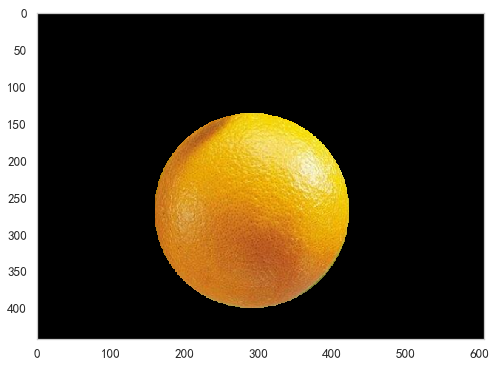

In [7]:
import cv2
import numpy as np
import math


def seg_circle(img):
    h, w = img.shape[:2]
    result = np.zeros([h, w, 3])
    circles = detect_circle(img)
    print(circles)
    print("圆心：", circles[0][0], circles[0][1])
    print("半径：", circles[0][2])
    for i in range(w):
        for j in range(h):
            if distance(i, j, circles[0][1], circles[0][0]) < circles[0][2]:
                result[i][j][:] = img[i][j][:]
    result = result.astype(np.uint8)
    cv2.imwrite('result.jpg', result)
    plt_show(result, gray=False)


def detect_circle(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(gray, (3, 3), 0)
    circles1 = cv2.HoughCircles(gaussian, cv2.HOUGH_GRADIENT, 1, 100, param1=200, param2=30, minRadius=0, maxRadius=0)
    circles = circles1[0, :, :]
    circles = np.uint16(np.around(circles))
    return circles


def distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1 - y2)**2)


img = cv2.imread('imgs/oringe.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
seg_circle(img)

# [ＨSV颜色分割](https://blog.csdn.net/ColdWindHA/article/details/82080176?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param)
HSV色彩空间表和cv2.inRange()的用法
颜色分布表：
<img src="imgs/colors.png">
结合`cv2.inRange()`可以清晰看到某个颜色区域图像位于图像的什么地方。

>用法cv2.inRange(img,low,high)，函数会将位于两个区域间的值置为255(白色)，位于区间外的值置为0（黑色）。


比如想要看到青色的区域处于图像中的什么位置，青色的区域是[78,43,46],[99,255,255]


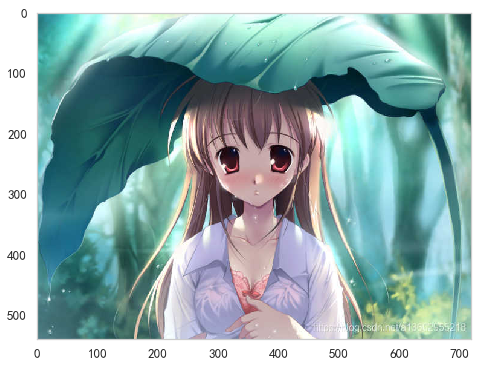

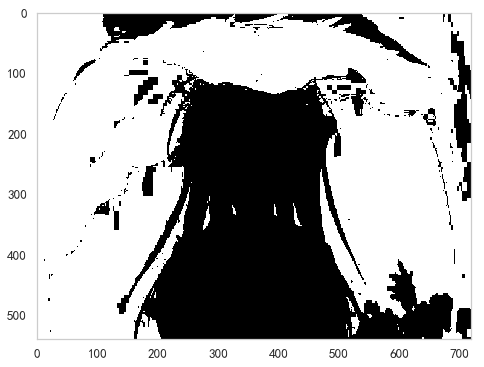

In [6]:
bgr_image = cv2.imread("imgs/person.jpg")  # opencv读进来的是bgr格式的图片,,,
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)  # ,,,将其转换为rgb格式
plt_show(rgb_image)
hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)   # 将rgb图像转换到hsv颜色空间上，，，
lower_red = np.array([78,43,46]) 
upper_red = np.array([99, 255, 255]) 
mask = cv2.inRange(hsv, lower_red, upper_red)  # ，，，选择对应的颜色区域

plt_show(mask)

# 边缘分割

## 轮廓前景切分GrabCut

In [ ]:
cell_img = cv2.imread('imgs/3-0-seg.jpg')
plt_show(cell_img)

In [ ]:
# It is a mask image where we specify which areas are background, foreground or probable background/foreground
mask = np.zeros(cell_img.shape[:2], np.uint8)
# These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
rect = (15, 15, 105, 100)
cv2.grabCut(cell_img, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)
# mask==2 或 0 的话重新标记为 0 （背景） 否则 标记为1（前景）
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_seg = cell_img * mask2[:, :, np.newaxis]  # np.newaxis（多维数组）增加一个轴

In [ ]:
# 数据结构 imgs = [{"name": "title", "content": img, "type":"img"}]
plt_series_show(imgs=[{"name": "foreground", "content": img_seg, "type":"img"},
                      {"name": "original", "content": cell_img, "type":"img"}], 
                        lay_out=(1,2), figsize=(12,6))

# 待增